In [1]:
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt
import networkx as nx

def generate_detailed_layout(rows, cols, rack_width=1000, rack_height=4000, walkway_width=2000):
    """
    Generates a detailed rack layout with walking ways.
    :param rows: Number of rows of racks
    :param cols: Number of columns of racks
    :param rack_width: Width of each rack in mm
    :param rack_height: Height of each rack in mm
    :param walkway_width: Width of walkways between racks in mm
    :return: (list of rack polygons, list of rack labels)
    """
    rack_polygons = []
    rack_labels = []

    for row in range(rows):
        for col in range(cols):
            # Bottom-left corner of the rack
            x_start = col * (rack_width + walkway_width)
            y_start = row * (rack_height + walkway_width)

            # Create a polygon for the rack
            rack_polygon = Polygon([
                (x_start, y_start),  # Bottom-left
                (x_start, y_start + rack_height),  # Top-left
                (x_start + rack_width, y_start + rack_height),  # Top-right
                (x_start + rack_width, y_start)  # Bottom-right
            ])
            rack_polygons.append(rack_polygon)
            rack_labels.append(f"Rack-{row+1}-{col+1}")

    return rack_polygons, rack_labels


In [2]:
def validate_walking_paths(rack_polygons):
    """
    Validates walking paths between racks based on centroids.
    :param rack_polygons: List of rack polygons
    :return: List of valid edges (tuples of polygon indices)
    """
    valid_edges = []
    for i in range(len(rack_polygons)):
        for j in range(i + 1, len(rack_polygons)):
            # Create a line between centroids of the polygons
            line = LineString([rack_polygons[i].centroid, rack_polygons[j].centroid])

            # Ensure the line does not intersect any racks
            if not any(line.intersects(rack) for k, rack in enumerate(rack_polygons) if k != i and k != j):
                valid_edges.append((i, j))

    return valid_edges


In [3]:
def visualize_detailed_layout(rack_polygons, rack_labels, valid_edges):
    """
    Visualizes the rack layout with walking ways and edges.
    :param rack_polygons: List of rack polygons
    :param rack_labels: List of rack labels
    :param valid_edges: List of valid edges
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot rack polygons
    for i, polygon in enumerate(rack_polygons):
        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=0.7, fc='blue', ec='black')  # Draw rack
        centroid = polygon.centroid
        ax.text(centroid.x, centroid.y, rack_labels[i], ha='center', fontsize=8, color='white')

    # Plot edges between rack centroids
    for edge in valid_edges:
        node1, node2 = edge
        x_coords = [rack_polygons[node1].centroid.x, rack_polygons[node2].centroid.x]
        y_coords = [rack_polygons[node1].centroid.y, rack_polygons[node2].centroid.y]
        ax.plot(x_coords, y_coords, 'r-', linewidth=1)  # Walking paths

    # Set plot limits and aspect
    ax.set_xlim(-1000, len(rack_polygons) ** 0.5 * 6000)  # Adjust limits
    ax.set_ylim(-1000, len(rack_polygons) ** 0.5 * 10000)
    ax.set_aspect('equal', adjustable='datalim')
    plt.title("Accurate Rack Layout with Walking Ways")
    plt.show()


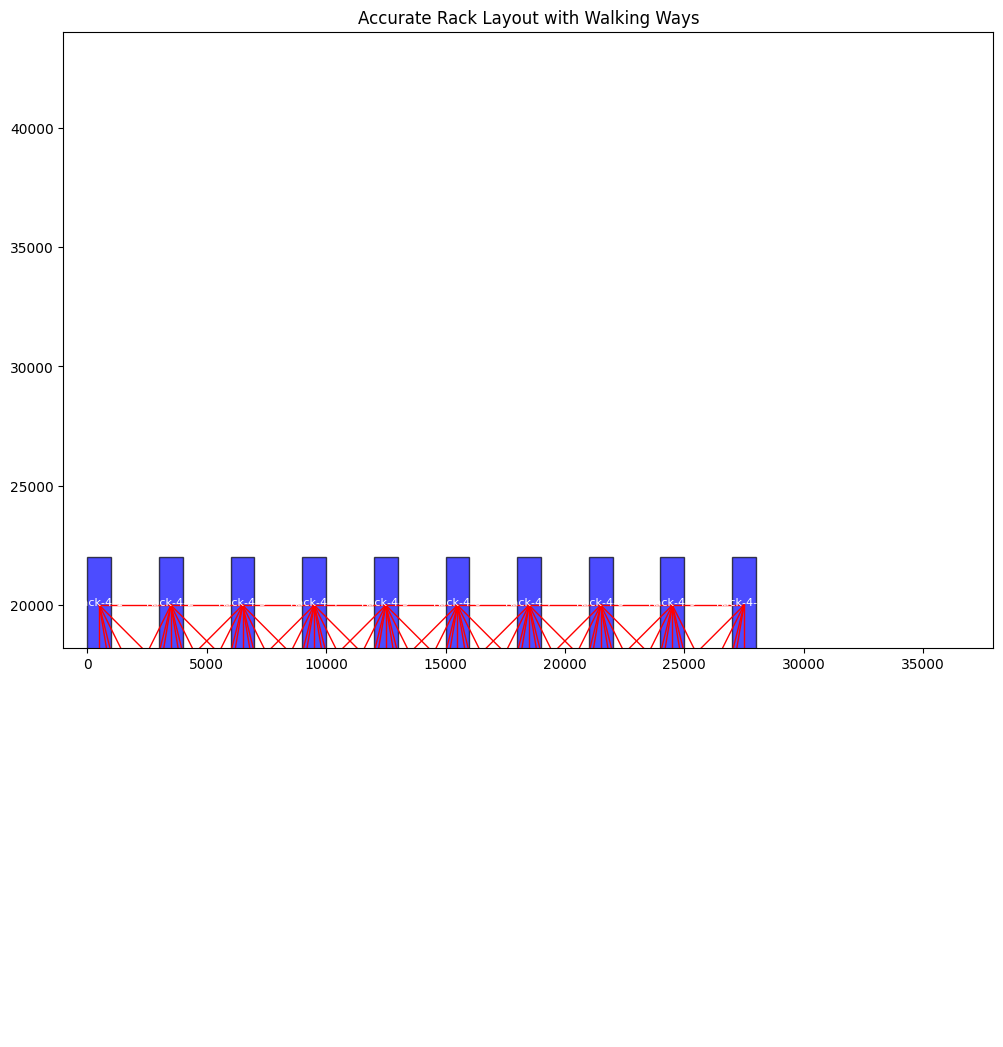

In [4]:
# Generate rack polygons and labels
rack_polygons, rack_labels = generate_detailed_layout(rows=4, cols=10, rack_width=1000, rack_height=4000, walkway_width=2000)

# Validate walking paths
valid_edges = validate_walking_paths(rack_polygons)

# Visualize the detailed layout
visualize_detailed_layout(rack_polygons, rack_labels, valid_edges)
